In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load some data in a pandas dataframe

df = None
#df =pd.read_csv("C:/Users/Admin/Pythonprojects/RAMS/data/Oilanalysis.csv",sep=";") #for those who would like to work from a local drive  
df = pd.read_csv("https://raw.githubusercontent.com/chrisrijsdijk/RAMS/master/data/Oilanalysis.csv", sep=";")

In [5]:
# check the datatypes in the dataframe to verify that all columns except for "Age" are numerical

#df.dtypes

In [6]:
# get a preview on the data

#df.head(3)
df.describe()
#len(df["BRSTVD"])

,BRSTVD,ISO 4406 large,ISO 4406 medium,ISO 4406 small,LNF-ROET,LNF-CUT,LNF-FIB,LNF-FW,LNF-NMW,LNF-SSW,...,SI,SN,ZN,LI,TAN,TBN,VIS40,VIS99,VLAMCC,WATER
count,125.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,...,128.000000,128.000000,128.000000,128.0,127.000000,125.000000,128.000000,126.000000,124.000000,128.000000
mean,3.946080,19.763780,16.165354,10.110236,0.184961,9.937008,2.456693,26.559055,68.362205,17.826772,...,8.140625,1.007812,1408.593750,1.0,3.170866,10.797600,51.492109,10.276254,173.370968,0.078750
std,3.342141,2.234139,1.946767,4.306194,0.178756,61.427690,5.892901,170.301910,577.163420,115.624673,...,3.223277,0.088388,113.656025,0.0,0.387321,0.483346,3.822323,0.725565,13.180250,0.046904
min,0.500000,15.000000,12.000000,1.000000,0.010000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,1.000000,1200.000000,1.0,2.400000,9.000000,41.300000,8.292000,134.000000,0.010000
25%,1.300000,19.000000,15.000000,10.000000,0.065000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,1.000000,1300.000000,1.0,2.900000,10.500000,48.697500,9.766000,165.875000,0.060000
50%,2.900000,20.000000,16.000000,11.000000,0.130000,1.000000,1.000000,3.000000,5.000000,1.000000,...,8.000000,1.000000,1400.000000,1.0,3.200000,10.800000,51.710000,10.235000,173.500000,0.070000
75%,5.500000,20.000000,17.000000,12.000000,0.265000,6.000000,1.000000,7.000000,12.000000,7.000000,...,9.000000,1.000000,1500.000000,1.0,3.450000,11.100000,53.860000,10.767500,182.500000,0.080000
max,13.500000,37.000000,25.000000,21.000000,1.050000,690.000000,58.000000,1900.000000,6500.000000,1300.000000,...,22.000000,2.000000,1600.000000,1.0,4.300000,12.400000,59.370000,12.290000,206.000000,0.480000


The column Age can not be represented as a histogram


C:\Users\Admin\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


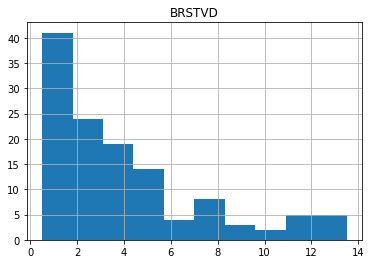

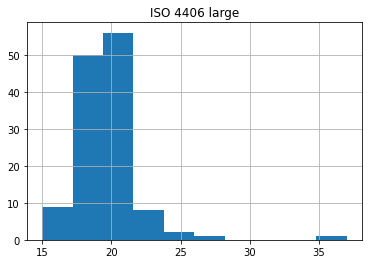

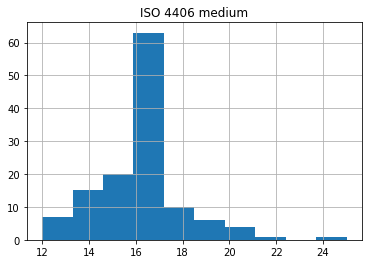

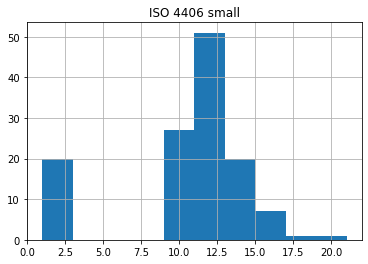

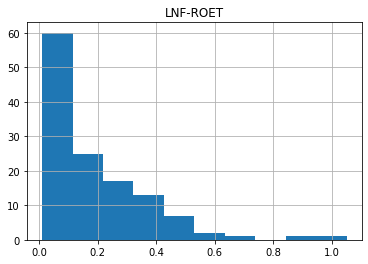

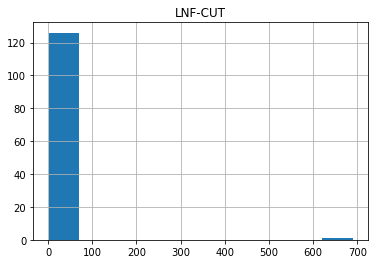

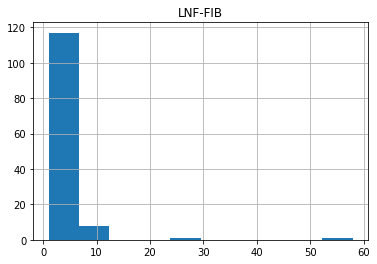

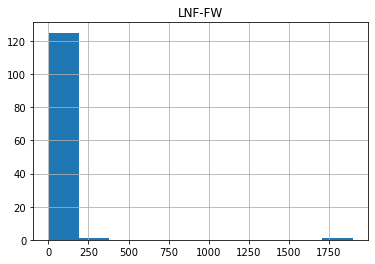

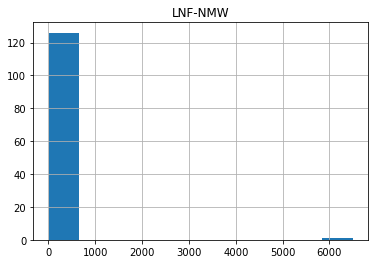

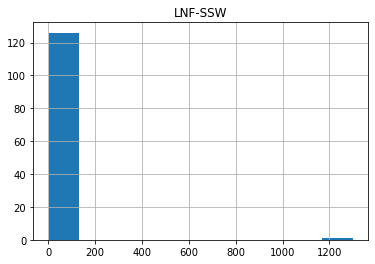

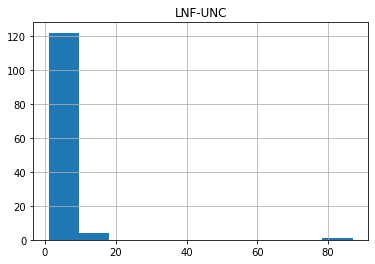

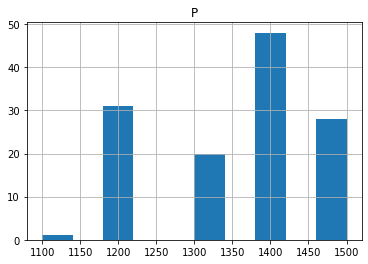

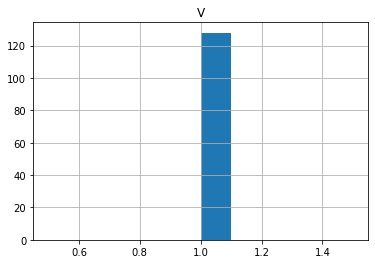

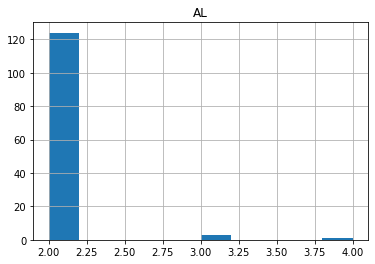

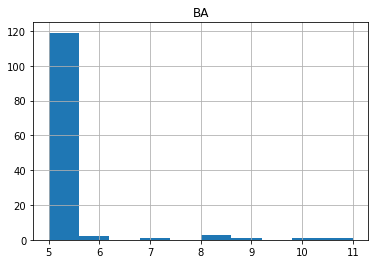

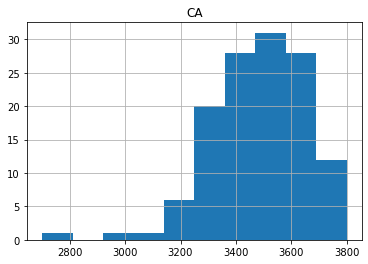

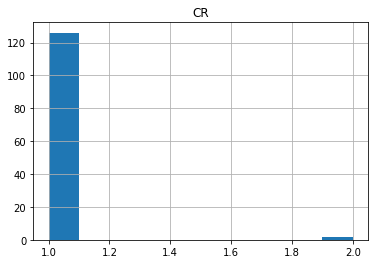

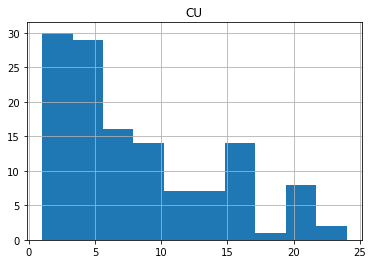

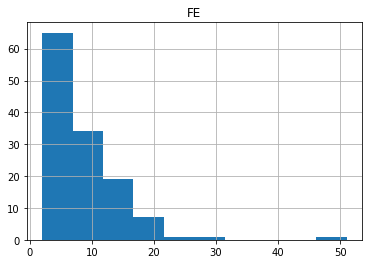

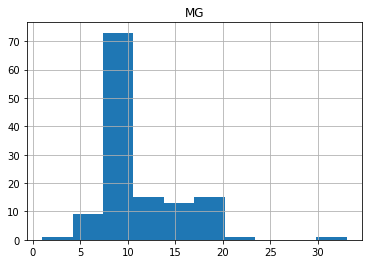

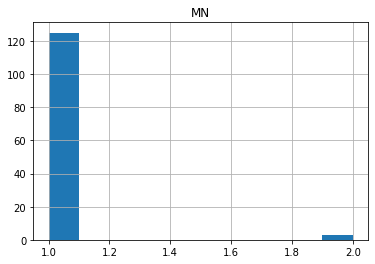

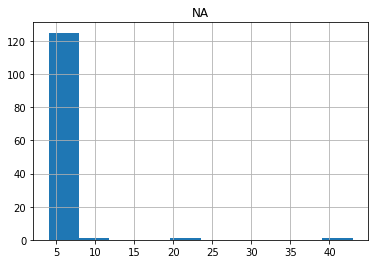

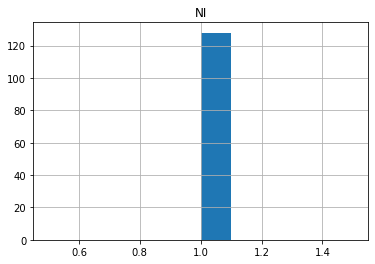

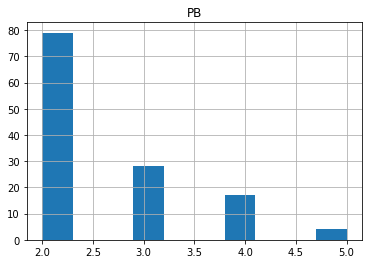

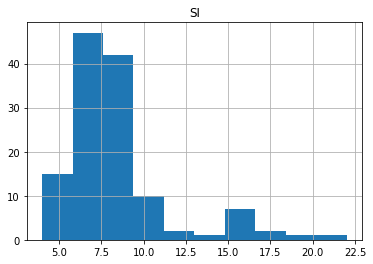

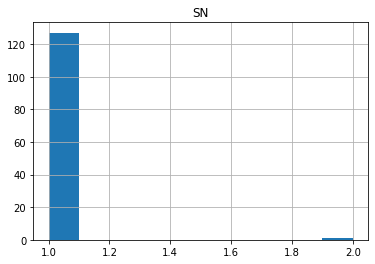

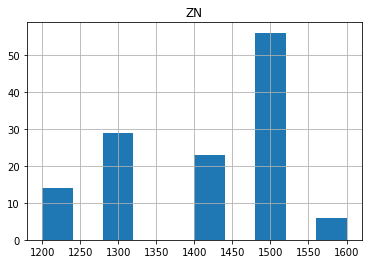

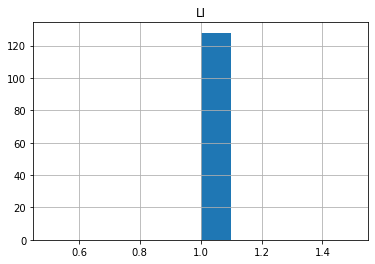

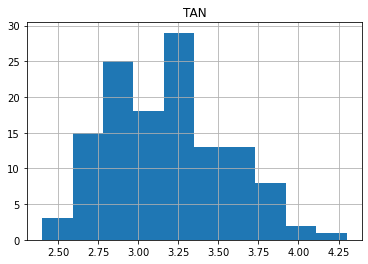

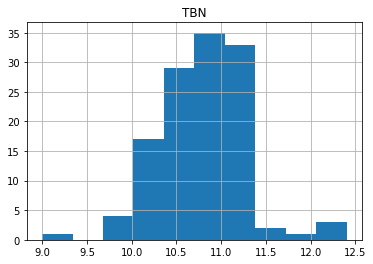

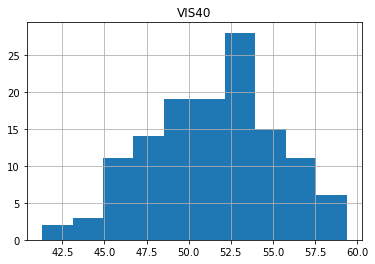

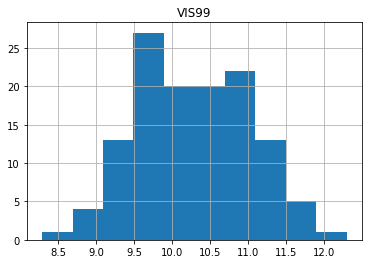

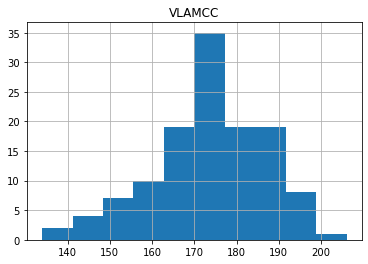

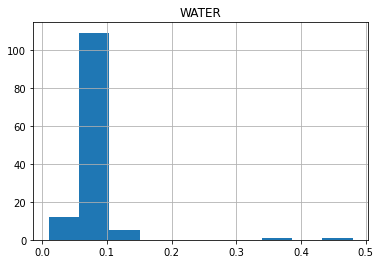

In [7]:
# plot histograms of the data in the dataframe
# causal effects of the columns that just contain one value remain invisible "ceteris paribus"
# check for outliers and explain them eventually

for col in df.columns: 
    try:      
        df[col] = pd.to_numeric(df[col]) 
        df.hist(column=col)
    except ValueError:
        print("The column "+col+' can not be represented as a histogram')

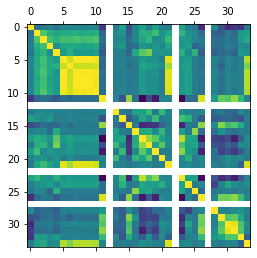

Index(['Age', 'BRSTVD', 'ISO 4406 large', 'ISO 4406 medium', 'ISO 4406 small',
       'LNF-ROET', 'LNF-CUT', 'LNF-FIB', 'LNF-FW', 'LNF-NMW', 'LNF-SSW',
       'LNF-UNC', 'P', 'V', 'AL', 'BA', 'CA', 'CR', 'CU', 'FE', 'MG', 'MN',
       'NA', 'NI', 'PB', 'SI', 'SN', 'ZN', 'LI', 'TAN', 'TBN', 'VIS40',
       'VIS99', 'VLAMCC', 'WATER'],
      dtype='object')


In [8]:
#create a correlation matrix to check for pairwise linear dependencies among the columns

dummy=df.iloc[:,1:]    #remove the "Age" column that is not numerical
dummy.corr(min_periods=15)
plt.matshow(dummy.corr(min_periods=15))
plt.show()
print(df.columns)
#dummy.corr(min_periods=15)
#del dummy

array([[<AxesSubplot:xlabel='LNF-CUT', ylabel='LNF-CUT'>,
        <AxesSubplot:xlabel='NA', ylabel='LNF-CUT'>,
        <AxesSubplot:xlabel='WATER', ylabel='LNF-CUT'>],
       [<AxesSubplot:xlabel='LNF-CUT', ylabel='NA'>,
        <AxesSubplot:xlabel='NA', ylabel='NA'>,
        <AxesSubplot:xlabel='WATER', ylabel='NA'>],
       [<AxesSubplot:xlabel='LNF-CUT', ylabel='WATER'>,
        <AxesSubplot:xlabel='NA', ylabel='WATER'>,
        <AxesSubplot:xlabel='WATER', ylabel='WATER'>]], dtype=object)

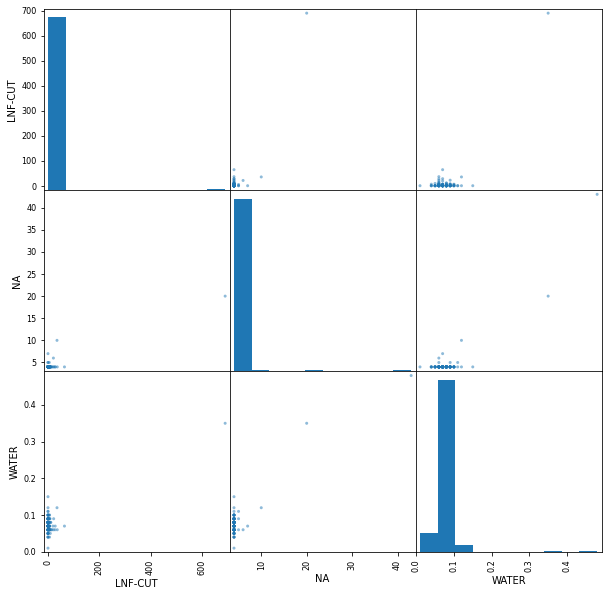

In [10]:
# expand some of the stronger linear dependencies in scatterplots

#pd.plotting.scatter_matrix(df.iloc[:,2:5],figsize=(10,10)) #plot the ISO4406 measurements
#pd.plotting.scatter_matrix(df.iloc[:,6:12],figsize=(10,10)) #plot the LNF measurements
pd.plotting.scatter_matrix(df.iloc[:,[6,22,34]],figsize=(10,10)) #show that Na, Water correlates with LNF due to the outlier
#pd.plotting.scatter_matrix(df.iloc[:,[1,31,32,33]],figsize=(10,10)) #plot BRSTFVD,VISxx,VLAMCC
#pd.plotting.scatter_matrix(df.iloc[:,[12,18,20,24,27]],figsize=(10,10)) #plot P, Cu, Mg, Pb, Zn


# 1-11 ['BRSTVD', 'ISO 4406 large', 'ISO 4406 medium', 'ISO 4406 small','LNF-ROET', 'LNF-CUT', 'LNF-FIB', 'LNF-FW', 'LNF-NMW', 'LNF-SSW',
#12-21 'LNF-UNC', 'P', 'V', 'AL', 'BA', 'CA', 'CR', 'CU', 'FE', 'MG',
#22-31 'MN', 'NA', 'NI', 'PB', 'SI', 'SN', 'ZN', 'LI', 'TAN', 'TBN', 'VIS40',
#32-34 'VIS99', 'VLAMCC', 'WATER']

In [9]:
#perform k-means clustering to check for nonlinear dependencies among the df columns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer


In [10]:
#dispose first column of the dataframe because it is not numerical

X=df.iloc[:,1:]


In [11]:
#impute data in case of NaN's by using K nearest neighbour

imputer = KNNImputer(n_neighbors=20, weights="distance")
X=imputer.fit_transform(X)


In [12]:
#transpose the dataframe while disposing the first non-numerical column

scaler=StandardScaler()

X = scaler.fit_transform(X)
#print(scaler.mean_)


In [12]:
#prepare an elbow plot to visually determine a feasible number of clusters

inertia = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    inertia.append(kmeanModel.inertia_)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
#create the elbow plot

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('number of clusters k')
plt.ylabel('Inertia')
plt.title('Choose the lowest k where the inertia tends to flatten')
plt.show()


NameError: name 'K' is not defined

<Figure size 1152x576 with 0 Axes>

In [14]:
# perform the k-means clustering while filling the preferred number of clusters in the first line

#the number of clusters k is:
k=3

kmeanModel = KMeans(n_clusters=k)
kmeanModel.fit(X)
kmeanModel.predict(X)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [15]:
# display some properties of the clustering as one whishes to

#kmeanModel.inertia_
#kmeanModel.labels_
#kmeanModel.n_iter_
#kmeanModel.cluster_centers_

In [16]:
# create a dataframe of the clustercenters

dfclustercenters=pd.DataFrame(kmeanModel.cluster_centers_, columns=df.columns[1:])
dfclustercenters


,BRSTVD,ISO 4406 large,ISO 4406 medium,ISO 4406 small,LNF-ROET,LNF-CUT,LNF-FIB,LNF-FW,LNF-NMW,LNF-SSW,...,SI,SN,ZN,LI,TAN,TBN,VIS40,VIS99,VLAMCC,WATER
0,-0.195431,-0.210999,-0.144140,-0.129106,-0.211534,-0.101977,-0.144165,-0.089237,-0.094867,-0.094783,...,-0.090340,-0.088736,0.553573,0.0,0.195931,0.411620,0.304119,0.430477,0.231823,-0.002768
1,0.414898,0.377309,0.199155,0.217181,0.411459,-0.057170,0.076055,-0.083111,-0.074463,-0.073276,...,0.135291,0.195218,-1.180040,0.0,-0.434468,-0.864036,-0.674314,-0.931447,-0.499454,-0.139125
2,0.406554,3.264593,4.573998,2.545010,1.945100,11.158806,9.500171,11.088012,11.231963,11.177106,...,2.447899,-0.088736,-0.959214,0.0,0.332725,-1.249486,0.514238,-0.193582,-0.190482,5.805793


In [17]:
# add the clusterlabels to the dataframe of samples

df["clusterlabels"]=kmeanModel.labels_
#df=df.sort_values("clusterlabels")
#df.describe()
dfclustermeans=df.groupby("clusterlabels").mean()

In [18]:
# save the dataframes

#dfclustercenters.to_csv("C:/Users/Chris/Pythonprojects/RAMS/notebook/clustercenters.csv", decimal=",")
df.to_csv("C:/Users/Admin/Pythonprojects/RAMS/notebook/clusteredsamples.csv",decimal=",")
dfclustermeans.to_csv("clustermeans.csv",decimal=",")